<a href="https://colab.research.google.com/github/ahmedelsayed16112002/Projects/blob/main/Ridge%2CLasso%2C_Linear_Regression_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries


In [23]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
mpg_df = pd.read_csv("/content/data.csv")

# preprocessing

In [12]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [14]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [15]:
mpg_df=mpg_df.replace('?',np.nan)


In [16]:
mpg_df=mpg_df.drop('car name',axis=1)


In [17]:
mpg_df.isnull().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [18]:
mpg_df = mpg_df.dropna()

In [19]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


# splitting Data

In [41]:
X = mpg_df.drop('mpg',axis=1)
y = mpg_df['mpg']

# visualizing Data

In [21]:
mpg_df.i

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

<Figure size 2000x600 with 0 Axes>

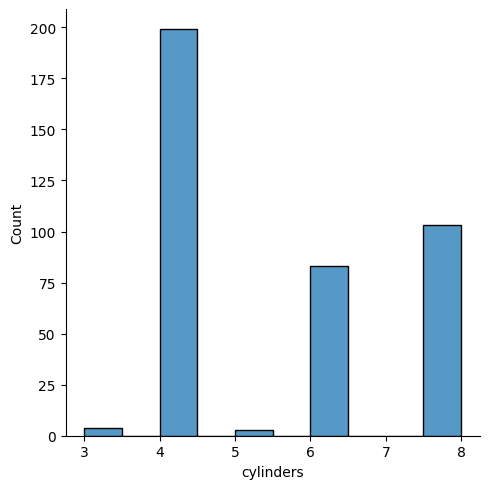

<Figure size 2000x600 with 0 Axes>

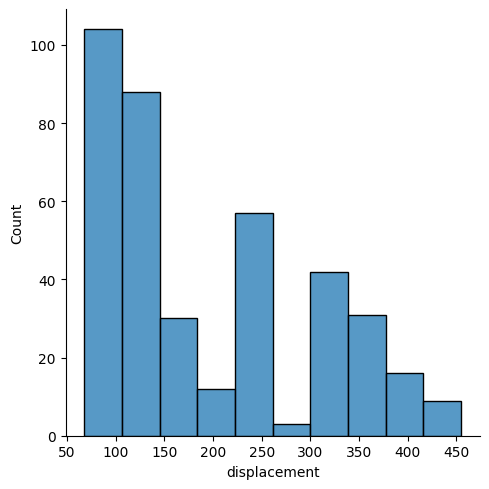

<Figure size 2000x600 with 0 Axes>

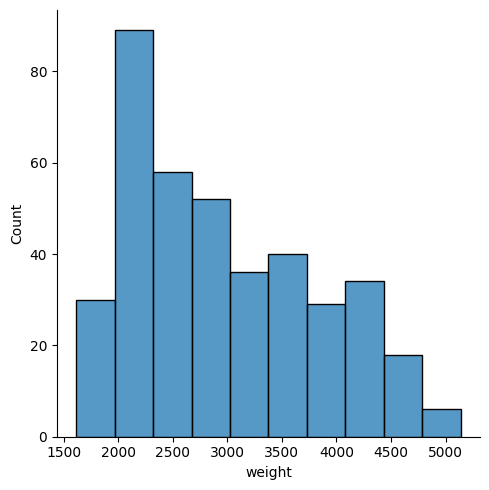

<Figure size 2000x600 with 0 Axes>

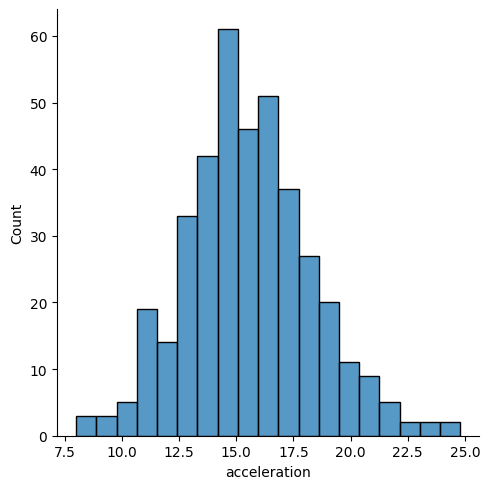

<Figure size 2000x600 with 0 Axes>

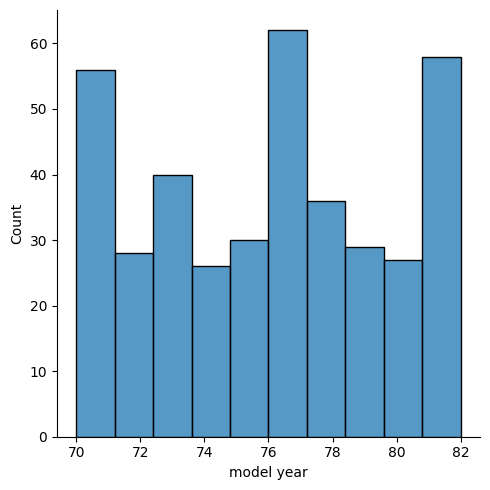

<Figure size 2000x600 with 0 Axes>

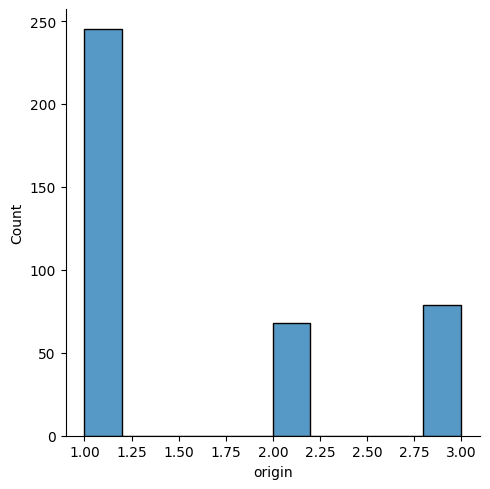

In [26]:
a = ['cylinders','displacement','weight','acceleration','model year','origin']
for col in a :
  plt.figure(figsize=(20,6))
  sns.displot(mpg_df[col])
  plt.show()

"displacement","horsepower","weight" columns are right skewed.It has little peakness towards right

"acceleration" is normally distributed

"model year" seems normal but wider at the center

"cylinders" has only certain values which repeating often

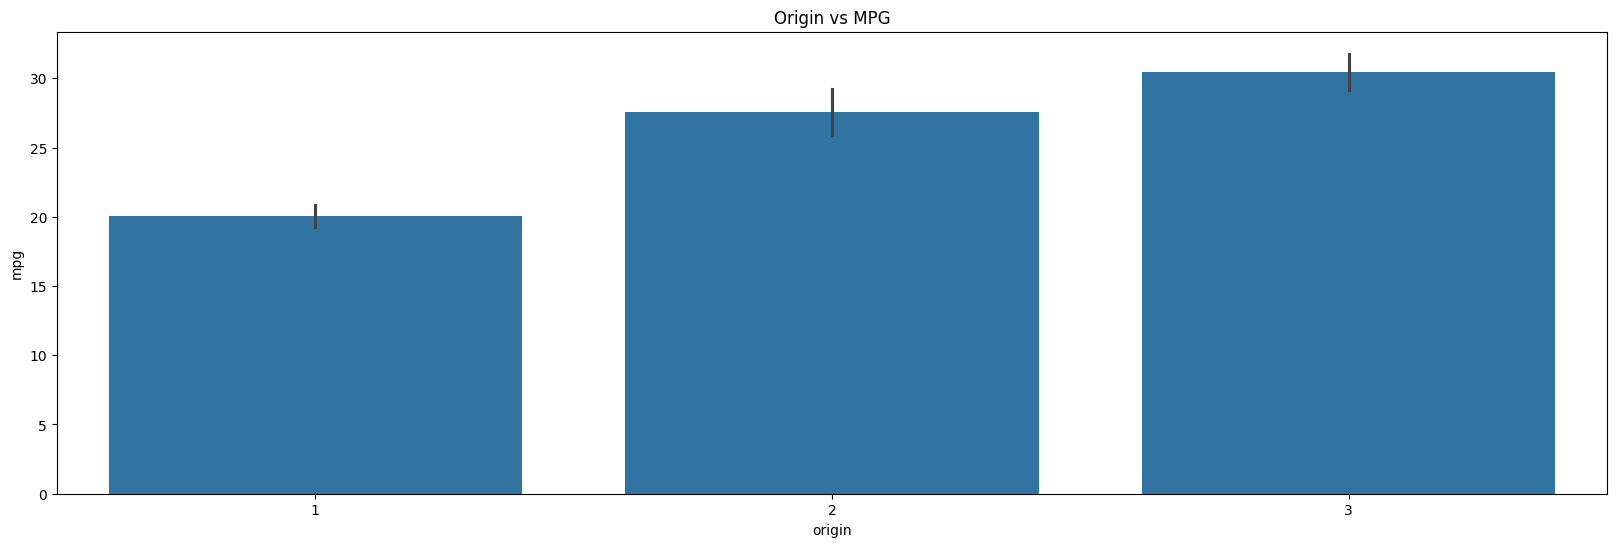

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(x='origin',y='mpg',data=mpg_df)
plt.title('Origin vs MPG')
plt.show()


origin 1 is more compared to others



<Axes: xlabel='mpg', ylabel='Density'>

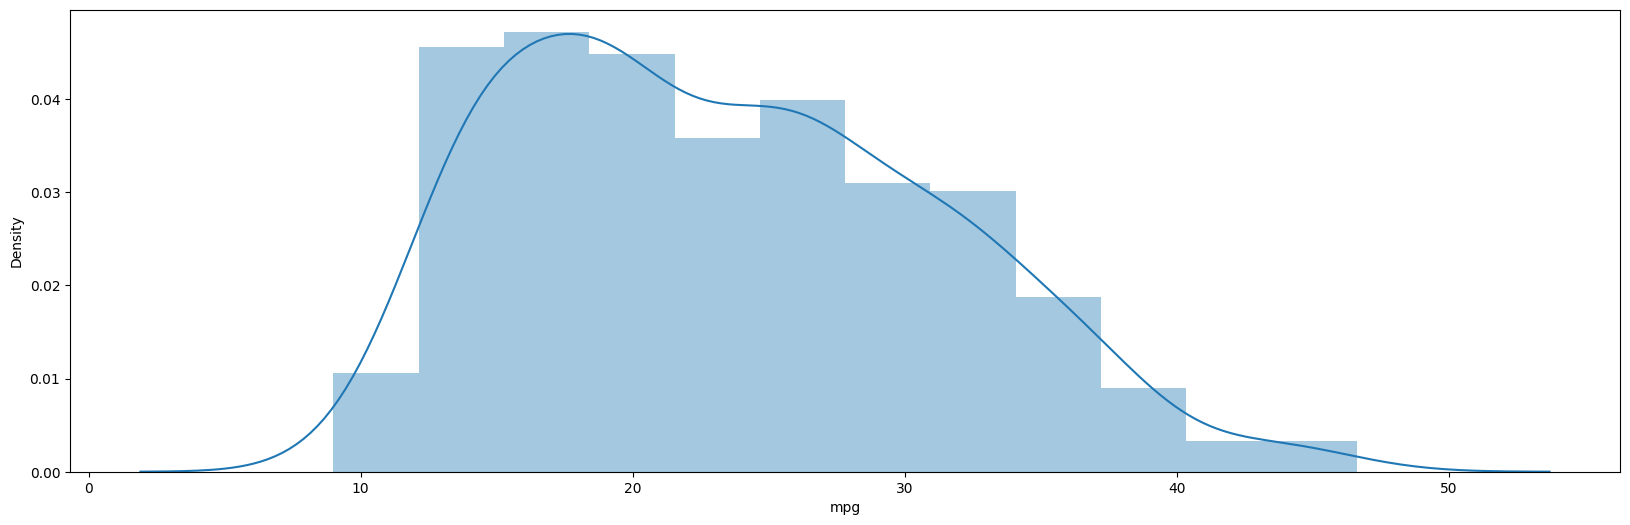

In [40]:
plt.figure(figsize = (20,6))
sns.distplot(y)


Little Skewness towards right



In [44]:
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=['mpg'])


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

#Simple linear model¶


In [53]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx , col_name in enumerate(X_train.columns):
  print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
print('The intercept for our model is {}'.format(regression_model.intercept_[0]))

The coefficient for cylinders is -0.0450163626079593
The coefficient for displacement is 0.26330139066320035
The coefficient for horsepower is -0.007969513893268783
The coefficient for weight is -0.7925802489229457
The coefficient for acceleration is 0.09963224370520013
The coefficient for model year is 0.35057882531654855
The coefficient for origin is 0.14251659089213592
The intercept for our model is -0.009314729522098029


Here the coeficient values are relatively smaller. So we can say this is the smoother model.



In [54]:
score = regression_model.score(X_train, y_train)
print(score)

0.8173705034988943


# Ridge

In [56]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
for idx , col_name in enumerate(X_train.columns):
  print('The coefficient for {} is {}'.format(col_name, ridge.coef_[idx]))
print('The intercept for our model is {}'.format(ridge.intercept_))

The coefficient for cylinders is -0.04197120178961588
The coefficient for displacement is 0.2492467621571855
The coefficient for horsepower is -0.012453384092000735
The coefficient for weight is -0.7795406362048212
The coefficient for acceleration is 0.09670578678566155
The coefficient for model year is 0.34931700678929206
The coefficient for origin is 0.14186262003390532
The intercept for our model is [-0.00959802]


In [57]:
score = ridge.score(X_train, y_train)
print(score)

0.8173538912305488



We can see less coefficients values compared to linear regression. Since it is smoother model we will not see much difference in coefficient.

# lasso

In [59]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
for idx , col_name in enumerate(X_train.columns):
  print('The coefficient for {} is {}'.format(col_name, lasso.coef_[idx]))
print('The intercept for our model is {}'.format(lasso.intercept_))

The coefficient for cylinders is -0.0
The coefficient for displacement is -0.0
The coefficient for horsepower is -0.04303645079140815
The coefficient for weight is -0.5750987438039314
The coefficient for acceleration is 0.0
The coefficient for model year is 0.2674206267932818
The coefficient for origin is 0.048455118688024254
The intercept for our model is [-0.01203649]


Many of the coefficients have become 0 so we can drop of those dimensions from the model.It has taken only 5 dimensions to build the model.Lasso is also used for feature selection.

# comparing scores

In [60]:
print('The score for Linear Regression is {}'.format(score))
print('The score for Ridge Regression is {}'.format(ridge.score(X_train, y_train)))
print('The score for Lasso Regression is {}'.format(lasso.score(X_train, y_train)))

The score for Linear Regression is 0.8173538912305488
The score for Ridge Regression is 0.8173538912305488
The score for Lasso Regression is 0.791050573370316


# We will use polynomial features to understand ridge and lasso better

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(274, 29)

# Simple non regularized linear model on poly features-¶


In [66]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_)

[ 4.14669303e-13  8.33908008e-01 -4.83051357e-01 -2.00696215e+00
 -4.14928744e+00  9.34941642e-02  2.51344812e+00  2.12914799e+00
  5.27665170e-01  1.85787837e+00 -1.07339498e+00  1.68819883e+00
 -4.49851795e-01  2.68570132e-01 -4.00216335e-01  2.16201865e+00
 -9.37213334e-01  1.14153362e+00  3.58105040e+00 -4.79899037e-01
 -1.82155038e-01 -5.06991511e-01  1.87668741e+00 -1.74807051e-02
 -3.22069379e-01 -2.38277205e+00  7.93997062e-01  1.90589363e+00
  6.46226167e-01]


Here we can see large values for coefficients. Since dimensions are more with less number of data points this model is clearly indicates the overfit

# Regularized Ridge Model¶


In [67]:
idge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.          0.78493009 -0.59237291 -2.04673279 -4.08360418  0.08104063
  2.51553183  1.95366435  0.34579604  1.33700203 -0.49802358  1.42166201
 -0.45233545  0.39152852 -0.05627146  1.78341787 -0.73790227  1.123876
  2.92493563 -0.41887666 -0.17887083 -0.54153641  1.67599734 -0.00985031
 -0.3030981  -1.95336328  0.77766983  1.83301332  0.61748033]


We can see coefficients are reduced. It will reduce close to zero but not exactly equal to zero. The 0 value shown up above is rounded up value


# Regularized Lasso Model¶


In [68]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.35705969 -0.1929916  -2.02384331 -4.19502536  0.11099828
  2.5296705   1.68721258  0.          0.41139379  0.35929043  0.68344904
 -0.          0.28567246  0.          1.39769609 -0.14297379  0.28189964
  2.03279352  0.         -0.16700633 -0.61657291  0.82471595 -0.
 -0.         -0.81144893  0.68864994  1.61549895  0.45883926]


# comparing scores

In [69]:
score = regression_model.score(X_train, y_train)
print('The score for Linear Regression is {}'.format(score))
print('The score for Ridge Regression is {}'.format(ridge.score(X_train, y_train)))
print('The score for Lasso Regression is {}'.format(lasso.score(X_train, y_train)))


The score for Linear Regression is 0.8986033278315659
The score for Ridge Regression is 0.8984904941513061
The score for Lasso Regression is 0.8969426578414155


Lasso is getting 86% accuracy with nearly half the number of dimensions.

Lasso is also used for feature selection and dimensionality reduction technique

## Summary

### Key Findings:
1. **Polynomial Features**:
   - Polynomial features were introduced to capture non-linear relationships in the data.
   - This increased the model's complexity, leading to potential overfitting without regularization.

2. **Model Performance**:
   - **Simple Linear Model**: Performed well on the original data but struggled with polynomial features due to overfitting.
   - **Ridge Regression**: Effectively reduced overfitting by penalizing large coefficients, performing well on both original and polynomial features.
   - **Lasso Regression**: Outperformed Ridge on polynomial features by performing feature selection (reducing some coefficients to zero), resulting in a simpler and more interpretable model.

3. **Best Model**:
   - **For Original Features**: Ridge regression is slightly better than the simple linear model due to its regularization effect.
   - **For Polynomial Features**: Lasso regression is the best choice, as it achieves high accuracy while reducing model complexity through feature selection.

### Recommendations:
- Use **Lasso regression with polynomial features** for this dataset, as it provides the best balance between accuracy, interpretability, and efficiency.
- Regularization (Ridge or Lasso) is essential when working with polynomial features to avoid overfitting.